# Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from notebook_utils.utils import *
#settings
pd.options.display.max_columns=1000

# Getting Data

In [3]:
connections = pd.read_csv('./assets/conexoes_espec.csv', sep=';')
individuals = pd.read_csv('./assets/individuos_espec.csv', sep=';')

In [4]:
connections.head()

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN


In [5]:
individuals.head()

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668


In [6]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [7]:
individuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


According the information a *priori* that we received: 

- the contamination rate varies from person to person;
- the contamination rate from a person A to B is different from B, the characteristics of both people (A and B);
- contamination only passes through connected individuals;

So, in order to do an *Exploratory Data Analysis (EDA)* we must to aggregate the *information* about sick and healthy individuals who are connected.

In [8]:
df = healthy_sick_aggregated_info(connections_info=connections, individuals_info=individuals)

In [9]:
df.head(10)

,V1,V2,grau,proximidade,idade_healthy,estado_civil_healthy,qt_filhos_healthy,estuda_healthy,trabalha_healthy,pratica_esportes_healthy,transporte_mais_utilizado_healthy,IMC_healthy,idade_sick,estado_civil_sick,qt_filhos_sick,estuda_sick,trabalha_sick,pratica_esportes_sick,transporte_mais_utilizado_sick,IMC_sick,prob_V1_V2
0,1,2,trabalho,visita_frequente,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.589462
1,1,3,trabalho,visita_rara,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.708465
2,2,4,trabalho,visita_casual,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,NaN
3,2,5,trabalho,visita_rara,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,0.638842
4,3,6,amigos,mora_junto,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,NaN
5,3,7,familia,visita_casual,55.0,solteiro,1.0,1.0,1.0,1.0,particular,NaN,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,0.709608
6,4,8,familia,mora_junto,50.0,divorciado,0.0,1.0,0.0,NaN,publico,21.445628,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,NaN
7,4,9,amigos,visita_casual,42.0,divorciado,1.0,0.0,1.0,NaN,publico,40.793339,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,0.465209
8,5,10,trabalho,visita_frequente,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,0.658706
9,5,11,trabalho,visita_casual,21.0,solteiro,0.0,0.0,0.0,0.0,publico,24.375770,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,NaN


Now, we have all information about connected people.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999999 entries, 0 to 999998
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   V1                                 999999 non-null  int64  
 1   V2                                 999999 non-null  int64  
 2   grau                               999999 non-null  object 
 3   proximidade                        999999 non-null  object 
 4   idade_healthy                      904062 non-null  float64
 5   estado_civil_healthy               949926 non-null  object 
 6   qt_filhos_healthy                  971132 non-null  float64
 7   estuda_healthy                     959869 non-null  float64
 8   trabalha_healthy                   993646 non-null  float64
 9   pratica_esportes_healthy           850875 non-null  float64
 10  transporte_mais_utilizado_healthy  956966 non-null  object 
 11  IMC_healthy                        8861

# Feature engineering

We can derive new features from *ICM*. The latter, in portuguese (*Índice de Massa Corporal*) or *BMI* (*Body Mass Index*) in english, can be *classified* into 7 levels according *World Health Organization*, namely:

- very underweight (`muito_abaixo_peso`): 16 to 16,9
- underweight (`abaixo_do_peso`): 17 to 18,4
- normal weight (`peso_normal`): 18,5 a 24,9
- overweight (`acima_do_peso`): 25 a 29,9
- obesity level I (`obesidade_lvl_1`): 30 a 34,9
- obesity level II (`obesidade_lvl_2`): 35 a 40 
- obesity level III (`obesidade_lvl_3`): greater than 40

In [11]:
df['IMC_class_healthy'] = df['IMC_healthy'].apply(imc_class)
df['IMC_class_sick'] = df['IMC_sick'].apply(imc_class)

In [12]:
#getting the unique values for this analysis
drop_duplicates_sick = df.drop_duplicates(subset='V1', keep='last')
agg_sick = drop_duplicates_sick.groupby(['IMC_class_sick']).agg(qtd=('IMC_class_sick','count'))

In [13]:
agg_sick['%'] = 100*agg_sick['qtd']/agg_sick['qtd'].sum()

<Figure size 720x432 with 0 Axes>

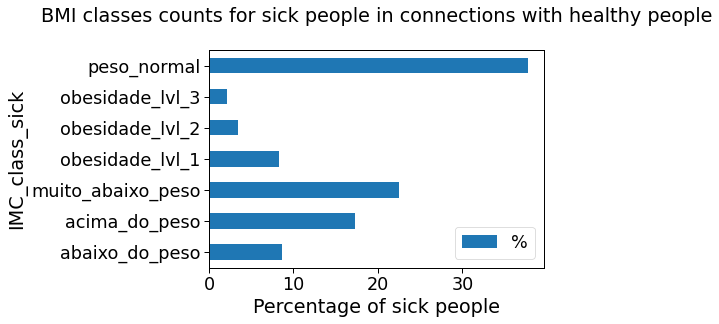

In [14]:
plt.figure(figsize=(10,6))
agg_sick.reset_index().plot.barh(x="IMC_class_sick", y="%")
plt.xlabel('Percentage of sick people')
plt.title('BMI classes counts for sick people in connections with healthy people\n')
plt.show()

In [15]:
#getting the unique values for this analysis
drop_duplicates_healthy = df.drop_duplicates(subset='V2', keep='last')
agg_healthy = drop_duplicates_sick.groupby(['IMC_class_healthy']).agg(qtd=('IMC_class_healthy','count'))

In [16]:
agg_healthy['%'] = 100*agg_healthy['qtd']/agg_healthy['qtd'].sum()

<Figure size 720x432 with 0 Axes>

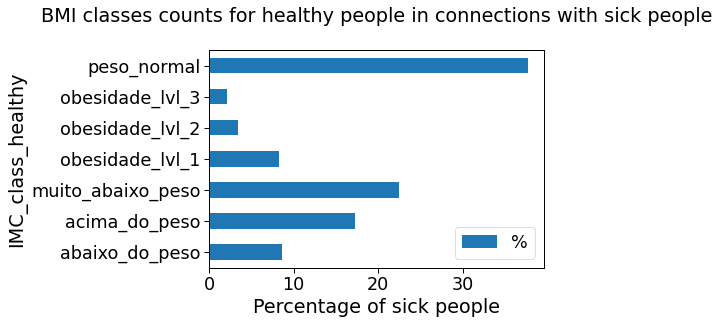

In [17]:
plt.figure(figsize=(10,6))
agg_healthy.reset_index().plot.barh(x="IMC_class_healthy", y="%")
plt.xlabel('Percentage of sick people')
plt.title('BMI classes counts for healthy people in connections with sick people\n')
plt.show()

We see that both graphics above look pretty the *same*. The majority of connections are between people with *normal weight* according BMI. It will be interesting in the future see the *correlation* between this new category (`IMC_class_healthy` or `IMC_class_sick`) and the `prob_V1_V2`. 

Let us check if the connected people belongs to the same *BMI group*

In [18]:
df_copy = df.copy()#make a copy

In [19]:
#checking if the connected individuals belong to the same BMI group
df_copy["same_BMI"] = df_copy.drop("IMC_class_sick", 1).isin(df_copy["IMC_class_sick"]).any(1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [20]:
#getting stats
df_copy_agg_bmi = df_copy.groupby(['same_BMI']).agg(qtd=('same_BMI', 'count'))
df_copy_agg_bmi['%'] = 100*df_copy_agg_bmi['qtd']/df_copy_agg_bmi['qtd'].sum()

In [21]:
df_copy_agg_bmi

,qtd,%
same_BMI,,
False,819826,81.982682
True,180173,18.017318


As we can see, although the charts are pretty the *same* the connected people (*sick* and *healthy*) belong to different BMI groups, mostly.

# Exploratory Data Analysis

Let us check first, the distribution of `prob_V1_V2`

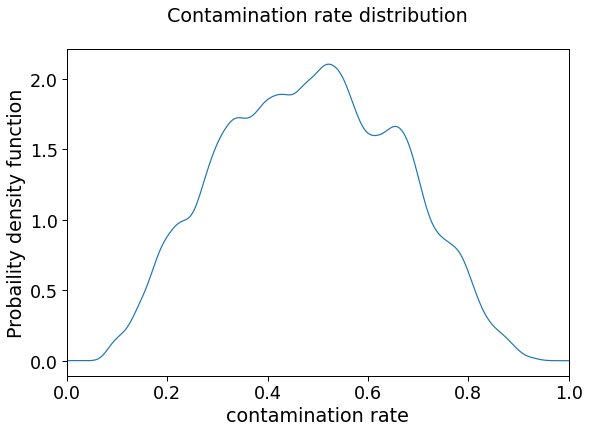

In [21]:
plt.figure(figsize=(9,6))
df['prob_V1_V2'].plot(kind='kde')
plt.ylabel('Probaility density function')
plt.xlabel('contamination rate')
plt.xlim([0,1])
plt.title('Contamination rate distribution\n')
plt.show()

In order to check the *gaussianity* of the `prob_V1_V2` distribution we will use the *D'Agostino's K-squared test*, which basically checks the gaussianity computing *skewness* and *kurtosis*.

In [22]:
p_value_gauss = d_agostino_k_2_test(data=df['prob_V1_V2'].dropna())
if p_value_gauss <= 0.05:
    print(f'The distribution is not normal. p_value: {p_value_gauss}')
else:
    print(f'The distribtion is normal. p-value: {p_value_gauss}')

The distribution is not normal. p_value: 0.0


Since the distribution *is not gaussian* we can not *replace* the `NaN` values with the *mean* value of `prob_V1_V2`. Any other value will insert a *bias* in the target.

In order to have some insights about the data we will investigate the correlation between *features* and *target*. The dataset contains two types of variables: *categorical* and *continuous*. The *target* is continuous. However, the *features* present both numerical and continuous type of variables. For different types of variables there are different methods for measuring the *correlation* among variables (*features* and *target*). Let us summarize the methods that we will use here:

- *Spearman's correlation* : It assumes *non linear* relationship between the numerical variables
- *Kruskal Wallis H Test*: This method groups the continuous variable using the categorical variable, measures the variance in each group and comparing it to the overall variance of the continuous variable. If the variance after grouping falls down significantly, it means that the categorical variable can explain most of the variance of the continuous variable and so the two variables likely have a strong association.


## Numerical Variables

### Sick people

In [23]:
df.head(2)

,V1,V2,idade_healthy,estado_civil_healthy,qt_filhos_healthy,estuda_healthy,trabalha_healthy,pratica_esportes_healthy,transporte_mais_utilizado_healthy,IMC_healthy,grau_healthy,proximidade_healthy,idade_sick,estado_civil_sick,qt_filhos_sick,estuda_sick,trabalha_sick,pratica_esportes_sick,transporte_mais_utilizado_sick,IMC_sick,prob_V1_V2,IMC_class_healthy,IMC_class_sick
0,1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.589462,acima_do_peso,peso_normal
1,1,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.708465,peso_normal,peso_normal


<Figure size 1368x864 with 0 Axes>

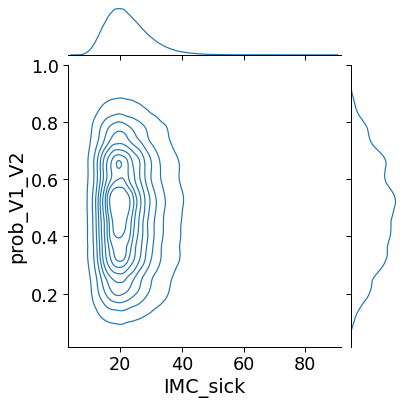

<Figure size 1368x864 with 0 Axes>

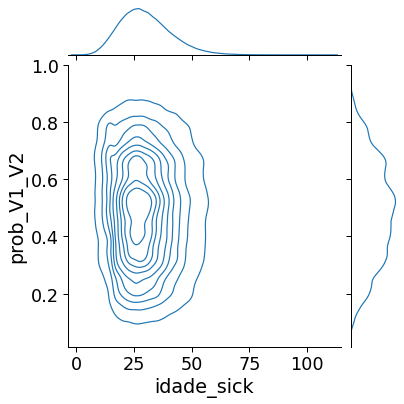

<Figure size 1368x864 with 0 Axes>

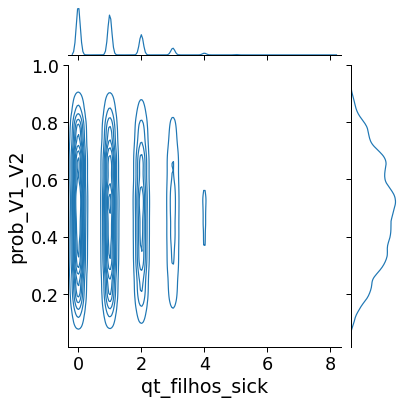

In [26]:
for category in ['IMC_sick','idade_sick','qt_filhos_sick']:
    plt.figure(figsize=(19,12))
    sns.jointplot(
    data=df[[category, 'prob_V1_V2']],
    x=category, y="prob_V1_V2",
    kind="kde")
    plt.show()

As we can see, the distributions above show that the correlation between the *numerical variables* and the target is **weak**. We can note similar wide ranges of `prob_V1_V2` while we vary the *numerical variable*. We can compute the correlation and check numerically and visually the correlation using *Spearman's Test*

,prob_V1_V2
IMC_sick,0.001442
idade_sick,-0.047056
qt_filhos_sick,-0.028517
prob_V1_V2,1.000000


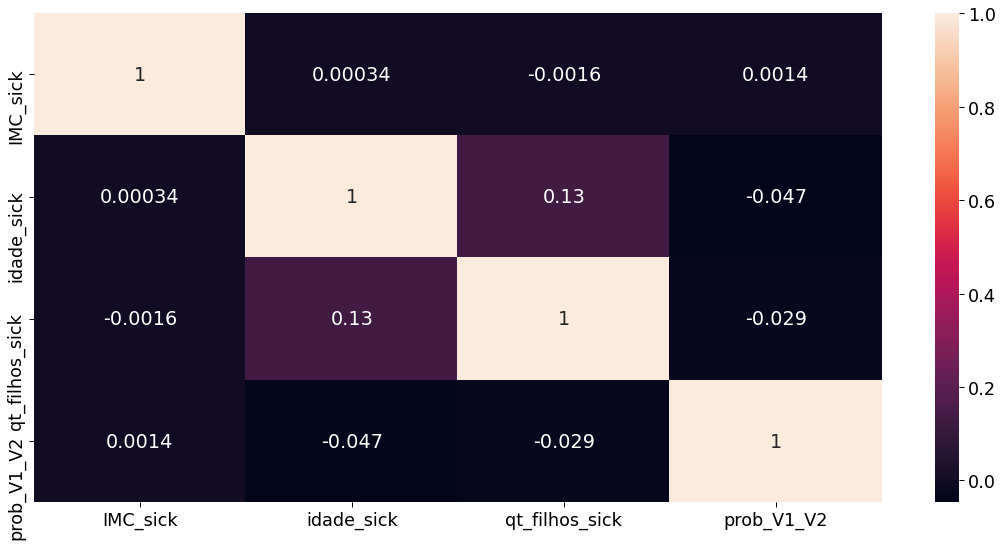

In [34]:
display(df[['IMC_sick','idade_sick','qt_filhos_sick','prob_V1_V2']].corr(method='spearman')[['prob_V1_V2']])
plt.figure(figsize=(19,9))
sns.heatmap(df[['IMC_sick','idade_sick','qt_filhos_sick','prob_V1_V2']].corr(method='spearman'), annot=True)
plt.show()

### Healthy people

<Figure size 1368x864 with 0 Axes>

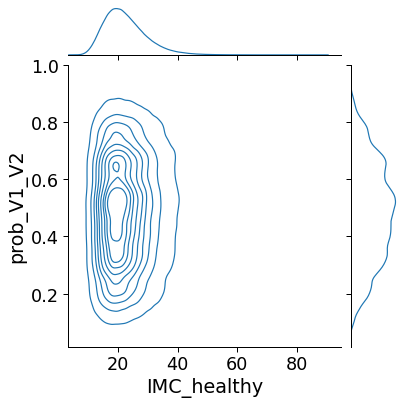

<Figure size 1368x864 with 0 Axes>

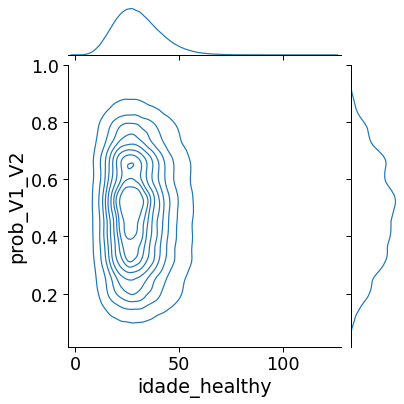

<Figure size 1368x864 with 0 Axes>

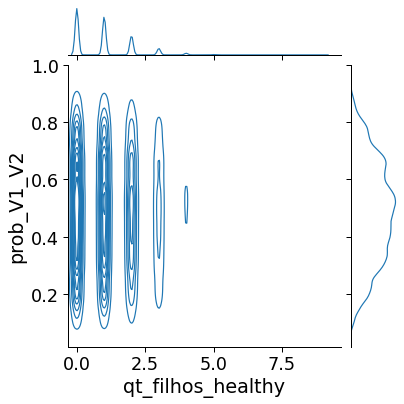

In [35]:
for category in ['IMC_healthy','idade_healthy','qt_filhos_healthy']:
    plt.figure(figsize=(19,12))
    sns.jointplot(
    data=df[[category, 'prob_V1_V2']],
    x=category, y="prob_V1_V2",
    kind="kde")
    plt.show()

,prob_V1_V2
IMC_healthy,0.030404
idade_healthy,-0.019077
qt_filhos_healthy,-0.002385
prob_V1_V2,1.000000


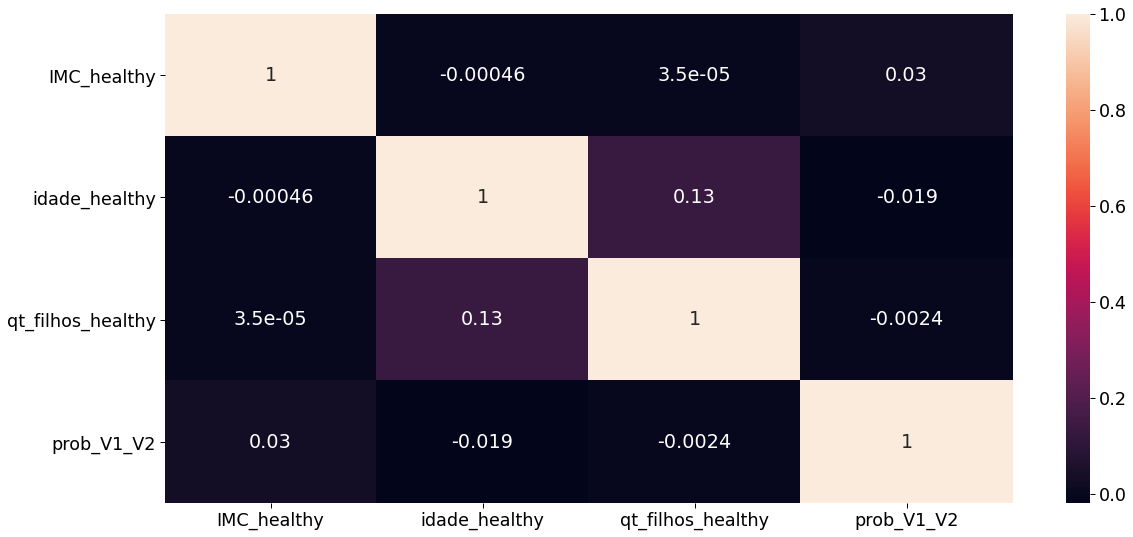

In [36]:
display(df[['IMC_healthy','idade_healthy','qt_filhos_healthy','prob_V1_V2']].corr(method='spearman')[['prob_V1_V2']])
plt.figure(figsize=(19,9))
sns.heatmap(df[['IMC_healthy','idade_healthy','qt_filhos_healthy','prob_V1_V2']].corr(method='spearman'), annot=True)
plt.show()

Again, we do not see  *strong correlation* between *numerical variables* and *target* (`prob_V1_V2`)

## Categorical variables

As we already said, we will use the *Kruskall Wallis (KW) Test* for measuring the correlation between categorical values and numerical ones, specially for `prob_V1_V2`. Because, we want to investigate the impact of *categorical* features in `prob_V1_V2`. We evaluate the performance of KW test using *p-value*. Hence:

- Null hypothesis (H0): All data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal

* If *p-value* > 0.05 : fail to reject H0, same distribution, that is,  **no correlation** between categorical and numerical variables. 
* If *p-value* < 0.05 : rejects H0, one or more sample distributions are not equal,that is, **correlation** between categorical and numerical variables

In [62]:
def kw_conclusion_test(p_value:float):
    """
    Helper function to print the conclusion of KW test.
    """
    if p_value > 0.05:
        print(f'P-value: {p_value}. Fails to reject H0, same distribution, that is, no correlation\n')
    else:
        print(f'P-value: {p_value}. Rejects H0, different distributions, that is, correlation\n')

### Sick people

In [53]:
df.head(2)

,V1,V2,grau,proximidade,idade_healthy,estado_civil_healthy,qt_filhos_healthy,estuda_healthy,trabalha_healthy,pratica_esportes_healthy,transporte_mais_utilizado_healthy,IMC_healthy,idade_sick,estado_civil_sick,qt_filhos_sick,estuda_sick,trabalha_sick,pratica_esportes_sick,transporte_mais_utilizado_sick,IMC_sick,prob_V1_V2,IMC_class_healthy,IMC_class_sick
0,1,2,trabalho,visita_frequente,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.589462,acima_do_peso,peso_normal
1,1,3,trabalho,visita_rara,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,0.708465,peso_normal,peso_normal


P-value: 0.0. Rejects H0, different distributions, that is, correlation



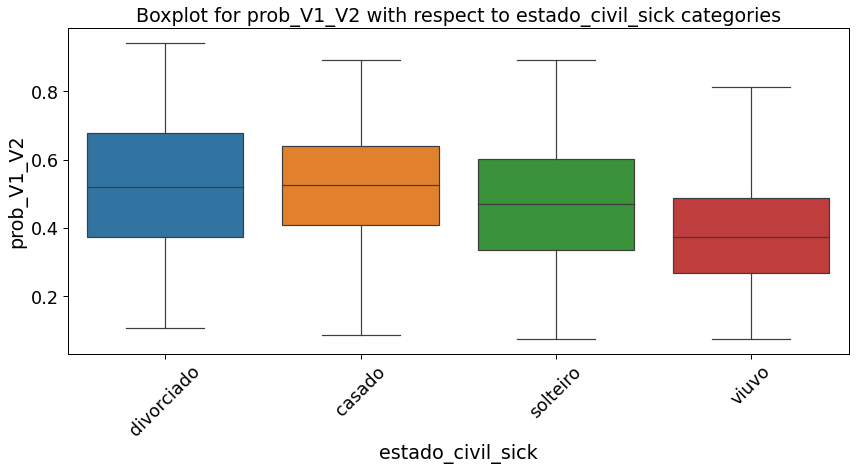

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



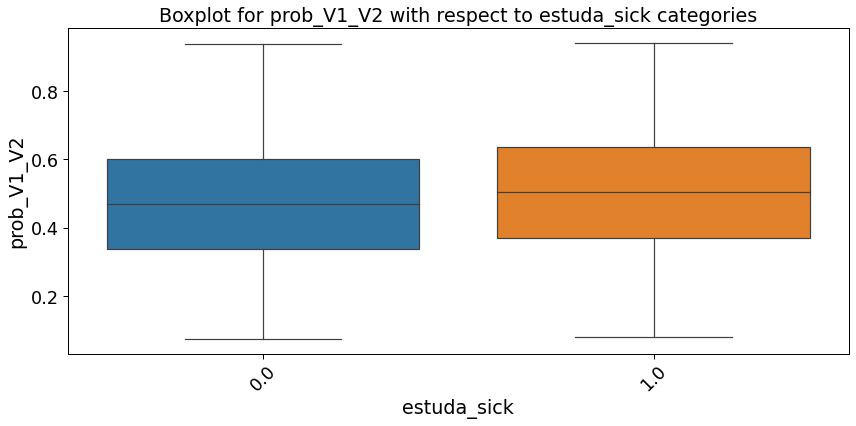

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



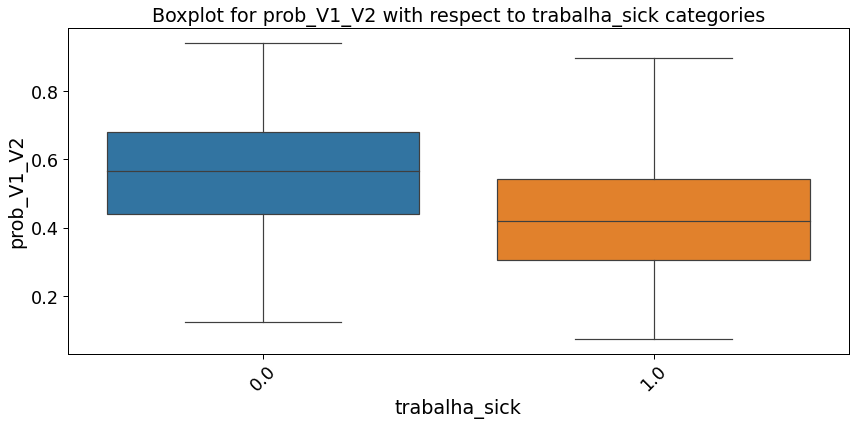

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



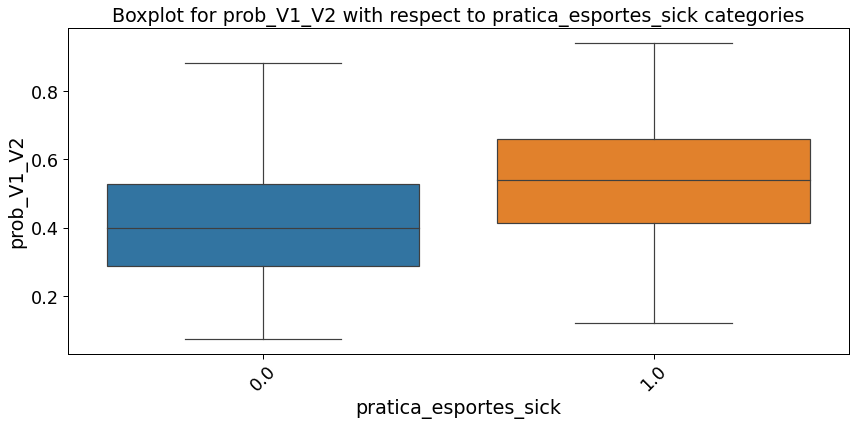

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



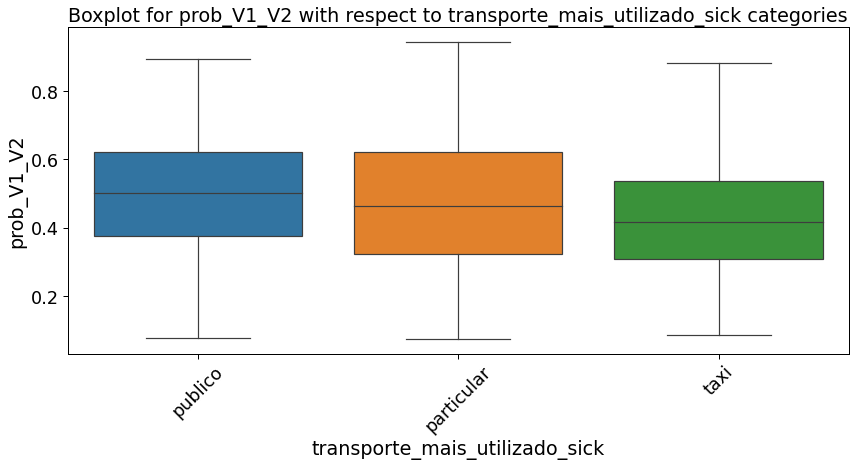

********************************************************************************************************************************************************************************************************
P-value: 0.1691603287453804. Fails to reject H0, same distribution, that is, no correlation



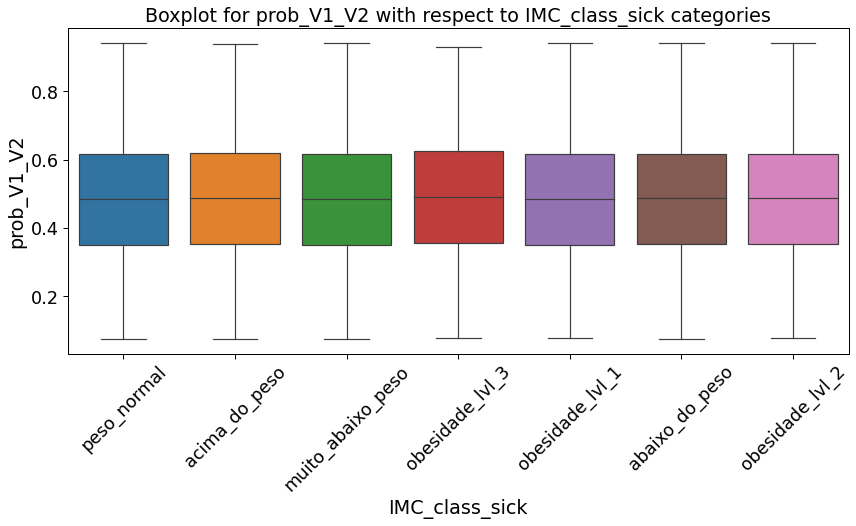

********************************************************************************************************************************************************************************************************


In [67]:
sick_categories = ['estado_civil_sick','estuda_sick', 'trabalha_sick', 'pratica_esportes_sick', 'transporte_mais_utilizado_sick', 'IMC_class_sick']
for category in sick_categories:
    kruskal_test = KruskallWallisTest(data_frame = df, categorical_var=category, 
                                  categorical_values=df[~df[category].isnull()][category].unique().tolist(), continuous_var='prob_V1_V2')
    kw_conclusion_test(kruskal_test.get_p_value())
    kruskal_test.box_plot(figsize=(14,6), title=f'Boxplot for prob_V1_V2 with respect to {category} categories')
    print('*'*200)

For all categories for *sick people* that we analyzed, we could see *low* p-values and looking at the charts and with KW test results in hand, we see a *weak* correlation between categorical variables and `prob_V1_V2` except for `IMC_class_sick`, which agrees with the results for `IMC_sick`, the numerical variable. Let us do the same for *healthy people*

P-value: 0.058075450219755874. Fails to reject H0, same distribution, that is, no correlation



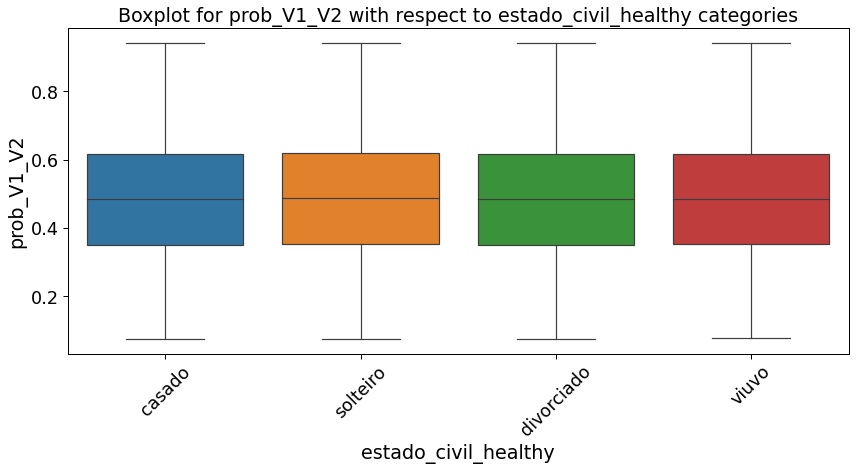

********************************************************************************************************************************************************************************************************
P-value: 0.06980006531946965. Fails to reject H0, same distribution, that is, no correlation



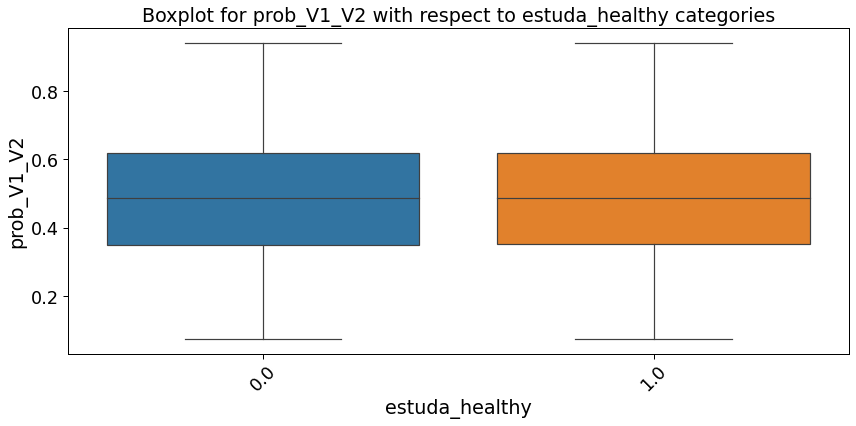

********************************************************************************************************************************************************************************************************
P-value: 0.040204782333910304. Rejects H0, different distributions, that is, correlation



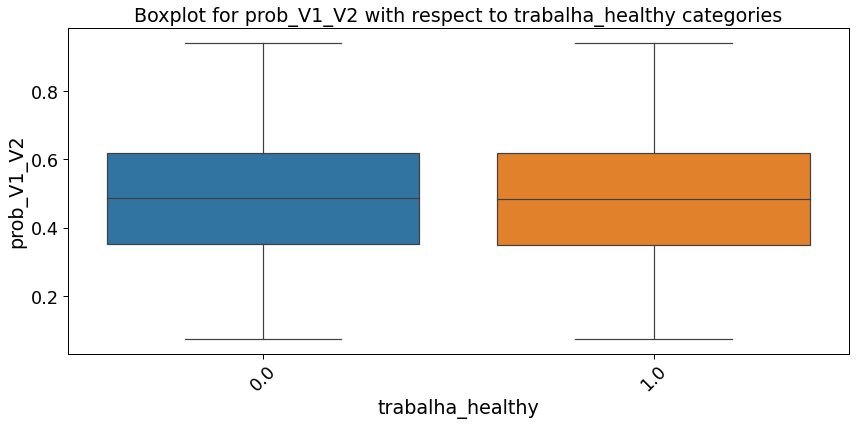

********************************************************************************************************************************************************************************************************
P-value: 0.14023211543619954. Fails to reject H0, same distribution, that is, no correlation



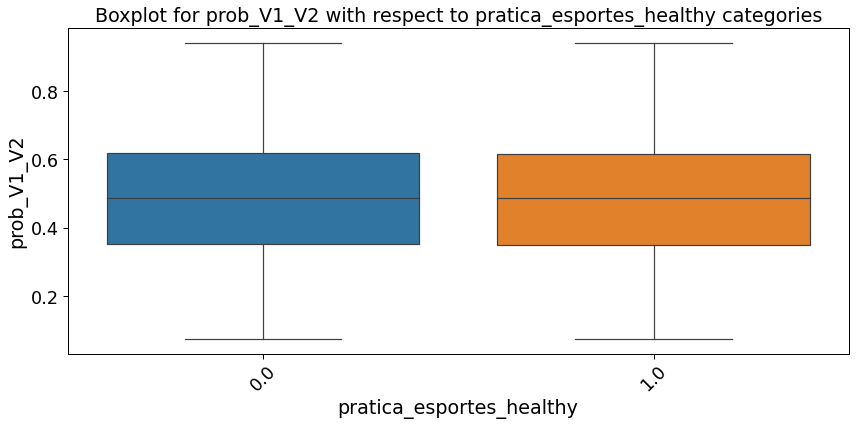

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



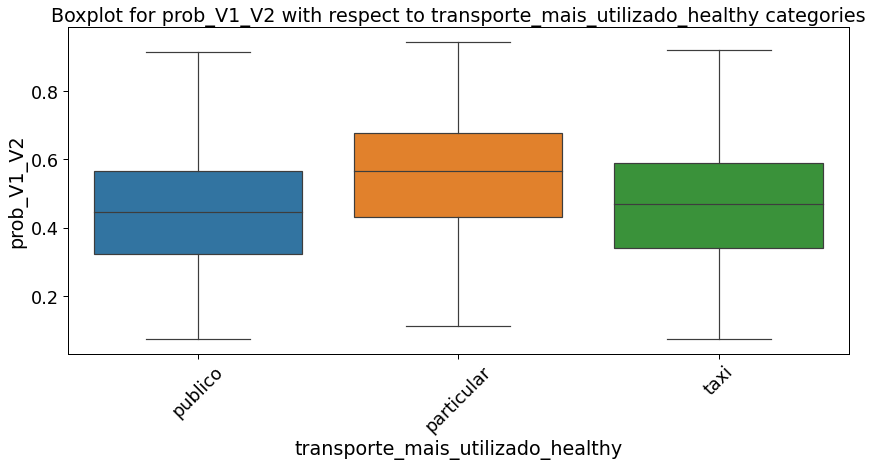

********************************************************************************************************************************************************************************************************
P-value: 3.6206679950541493e-87. Rejects H0, different distributions, that is, correlation



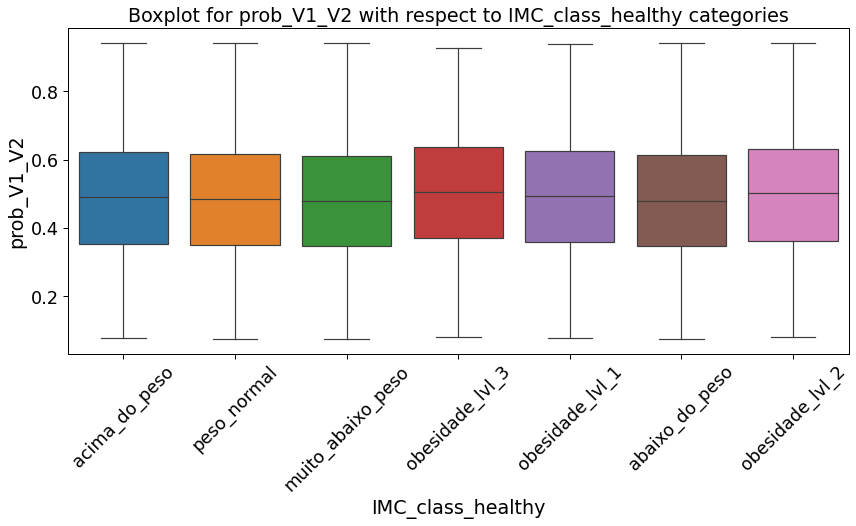

********************************************************************************************************************************************************************************************************


In [69]:
healthy_categories = ['estado_civil_healthy','estuda_healthy', 'trabalha_healthy', 'pratica_esportes_healthy', 'transporte_mais_utilizado_healthy', 'IMC_class_healthy']
for category in healthy_categories:
    kruskal_test = KruskallWallisTest(data_frame = df, categorical_var=category, 
                                  categorical_values=df[~df[category].isnull()][category].unique().tolist(), continuous_var='prob_V1_V2')
    kw_conclusion_test(kruskal_test.get_p_value())
    kruskal_test.box_plot(figsize=(14,6), title=f'Boxplot for prob_V1_V2 with respect to {category} categories')
    print('*'*200)

From the perspective of *healthy people*, the correlation appears only with respect to `transporte_mais_utilizado` and `IMC_class_healthy`. Let us finalize the categorical analysis checking if there is correlation between: `grau` and `proximidade` with `prob_V1_V2`

P-value: 0.0. Rejects H0, different distributions, that is, correlation



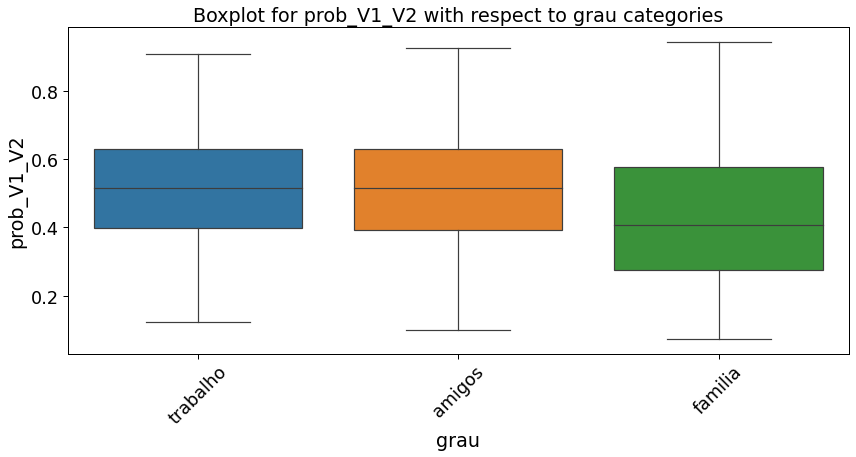

********************************************************************************************************************************************************************************************************
P-value: 0.0. Rejects H0, different distributions, that is, correlation



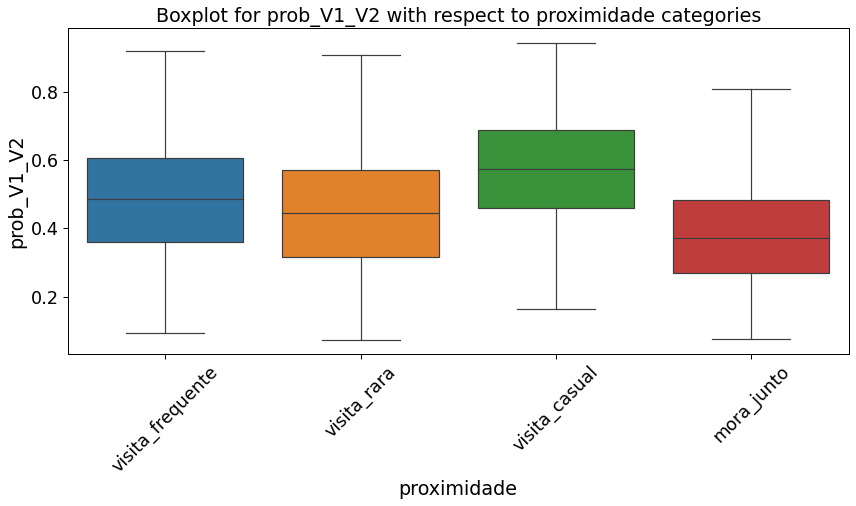

********************************************************************************************************************************************************************************************************


In [70]:
relationship_categories = ['grau', 'proximidade']
for category in relationship_categories:
    kruskal_test = KruskallWallisTest(data_frame = df, categorical_var=category, 
                                  categorical_values=df[~df[category].isnull()][category].unique().tolist(), continuous_var='prob_V1_V2')
    kw_conclusion_test(kruskal_test.get_p_value())
    kruskal_test.box_plot(figsize=(14,6), title=f'Boxplot for prob_V1_V2 with respect to {category} categories')
    print('*'*200)

Let us *dive in* into *sick people* category. Because we already seen that there is more *correlated* variables with `prob_V1_V2`. Let us dive in considering also the categories: `grau` and `proximidade`.

In [98]:
#some properties for the charts below
mean_props = meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}

<Figure size 432x288 with 0 Axes>

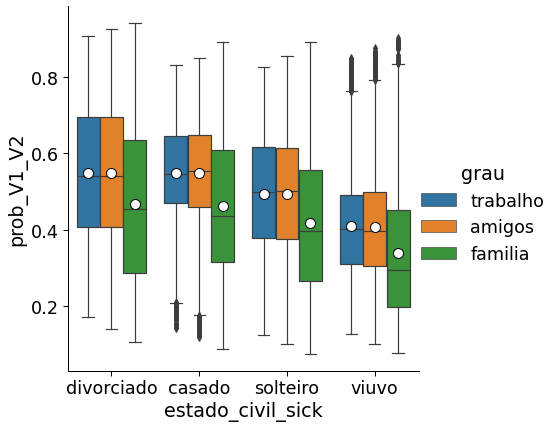

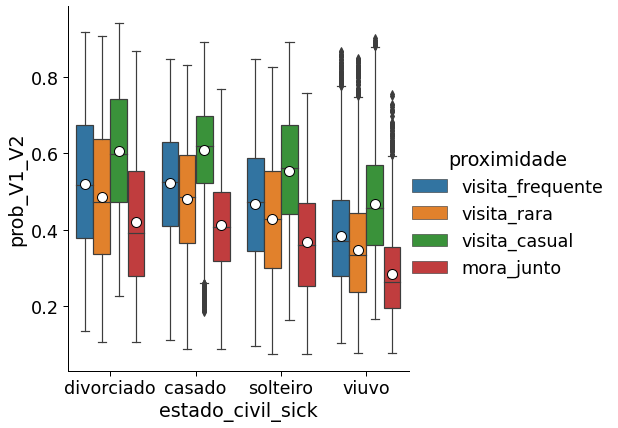

******************************************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

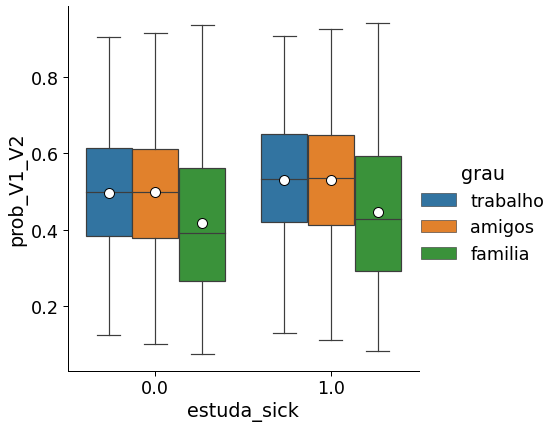

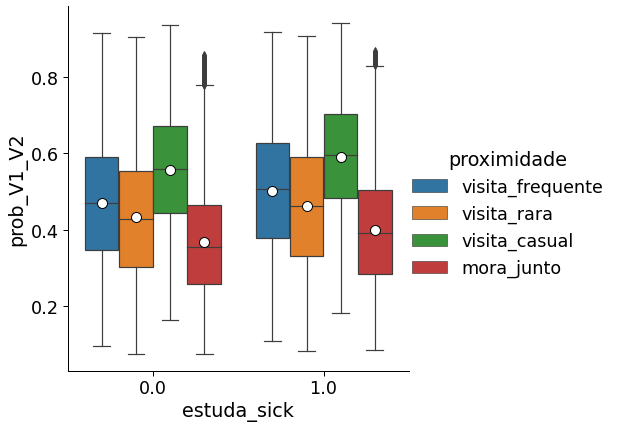

******************************************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

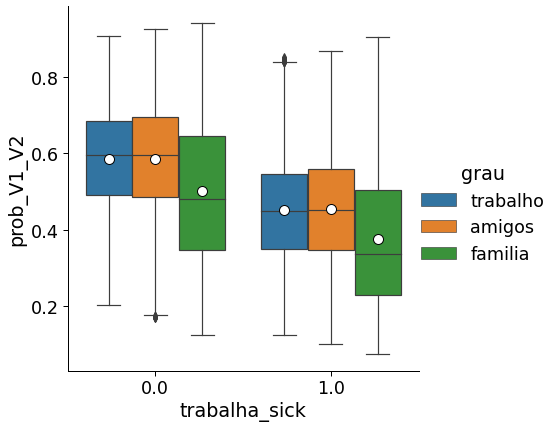

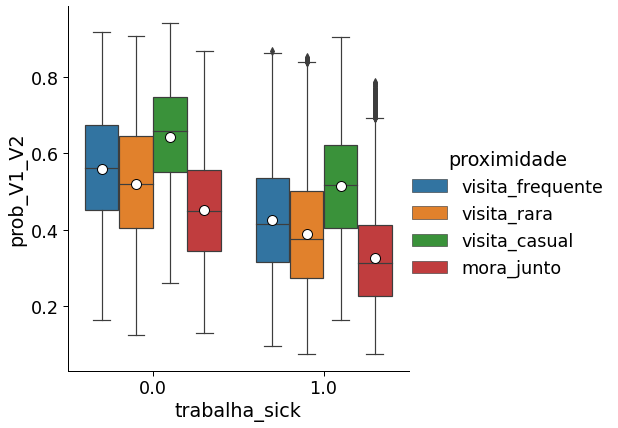

******************************************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

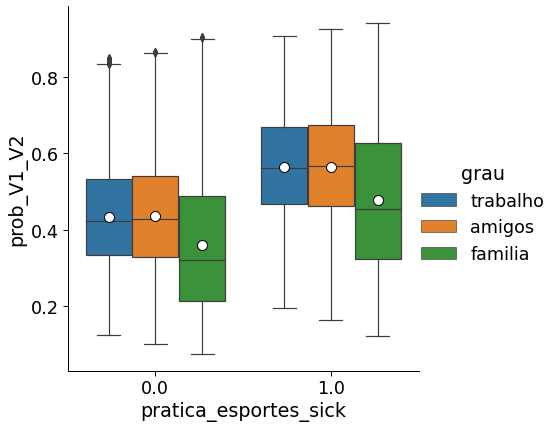

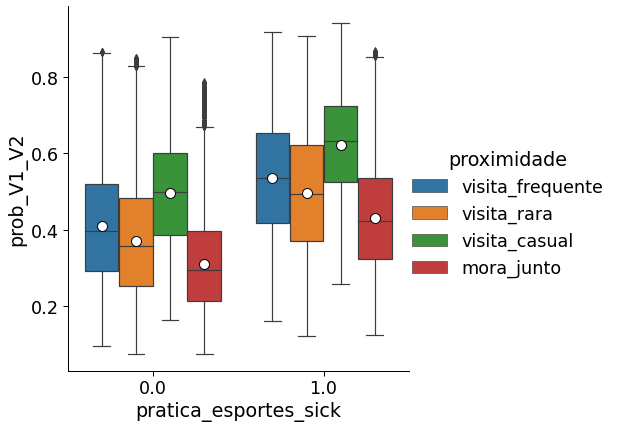

******************************************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

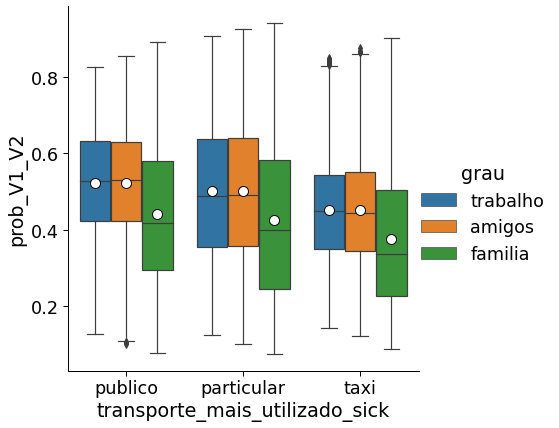

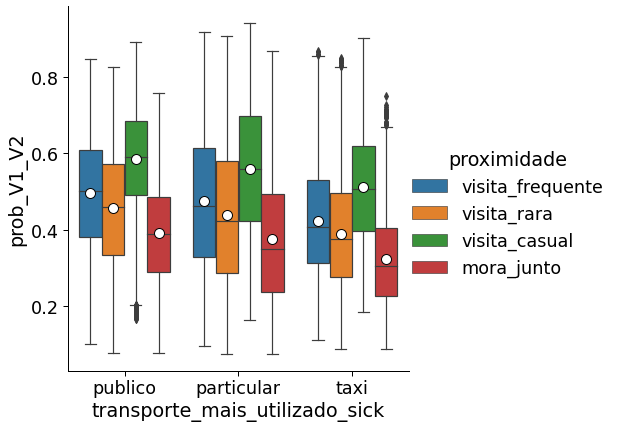

******************************************************************************************************************************************************


In [108]:
for item in ['estado_civil_sick','estuda_sick', 'trabalha_sick', 'pratica_esportes_sick', 'transporte_mais_utilizado_sick']:
    plt.figure()
    sns.catplot(x=item, y="prob_V1_V2", hue="grau", kind="box", data=df, height=6, showmeans=True,meanprops=mean_props) 
    sns.catplot(x=item, y="prob_V1_V2", hue="proximidade", kind="box", data=df, height=6, showmeans=True,meanprops=mean_props)
    plt.show()
    print('*'*150)

The main conclusion that we can obtain from the charts in the above are the following:

- The cases with higher probability are always in relationships like: work (`trabalho`) and friends (`amigos`)
- Besides that, we also note higher probabilities in connections characterized by *casual visit* (`visita_casual`) which are in agreement with *work* and *friends*

# Insights

We did an *EDA* in order to understand what type of insights we can obtain from data. In summary, we have found:

- We know that the `prob_V1_V2` as the *contamination rate* and can be understood as the *probability of contamination* as well. From the perpesctive of *sick individual* is the probability of transmitting the disease and, of course, from healthy person is the probability of getting sick. We could note that the distribution of contaimnation rate, namely `prob_V1_V2`, does not follow a gaussian distribution (D'Agostino's K-squared test). Looking at the distribution chart for `prob_V1_V2` we see that the latter covers a wide range of values.
- We did *Spearman's tests* (Kruskall Wallis test) to cover the correlation between *numerical (categorical) variables* and the target (`prob_V1_V2`). The main findings were:

    a) From both *sick* and *healthy* people perpespectives the amount of children (`qtd_filhos`), age (`idade`) and BMI (`IMC`) does not *correlate* with the contamination rate (`prob_V1_V2`);
    
    b) For *sick people* pratically *all* categorical variables correlates with `prob_V1_V2`;
    
    c) For *healthy* people althought the BMI itself does not influences `prob_V1_V2`, if we transform the latter into categories, namely `IMC_class_healthy` we see a correlation with `prob_V1_V2`, specially for categories: `obesidade_lvl_1`, `obesidade_lvl_1` and `obesidade_lvl_1`. We can see in box charts a slight difference among the boxes. This finding makes sense, if we assume that the BMI is a reasonable metric for a *health condition* of a certain individual, so the `IMC_class_healthy` looks a good feature to distinguish higher or lower probabilities of contamination. 
    
    d) The *most used transport* (`transporte_mais_utilizado`) by *healthy* people correlates with the contamination rate  
    
    e) From the perspective of *sick* people, relationships with *casual meetings* have higher probabilities of contamination rate followed by *frequent meetings*. There is a reasonable logic in this case, e.g. frequent meetings associated to work and casual ones with friends.
    

# Modelling

For modelling phase we will use the *PyCaret*, an AutoML open source python library. The outputs of *PyCaret* are very intuitive and sometimes *self-explained*. But we will enter into the details when it is needed.

In [27]:
from pycaret.regression import *

In [28]:
#dropping prob_V1_V2 nan values
df_reg = df[~df['prob_V1_V2'].isnull()].drop(['V1','V2'], axis=1).reset_index(drop=True)

In [29]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   grau                               499999 non-null  object 
 1   proximidade                        499999 non-null  object 
 2   idade_healthy                      452275 non-null  float64
 3   estado_civil_healthy               474886 non-null  object 
 4   qt_filhos_healthy                  485642 non-null  float64
 5   estuda_healthy                     480020 non-null  float64
 6   trabalha_healthy                   496777 non-null  float64
 7   pratica_esportes_healthy           425456 non-null  float64
 8   transporte_mais_utilizado_healthy  478352 non-null  object 
 9   IMC_healthy                        443024 non-null  float64
 10  idade_sick                         451702 non-null  float64
 11  estado_civil_sick                  4750

In [31]:
reg = setup(df_reg, target = 'prob_V1_V2', session_id=123, log_experiment=False, normalize=True, normalize_method='robust', 
            numeric_features=['qt_filhos_sick','qt_filhos_healthy'])

,Description,Value
0,session_id,123
1,Target,prob_V1_V2
2,Original Data,"(499999, 21)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(349999, 65)"


As the dataframe above already shows we selected the following strategies for the ML constructor:

- I normalized the data using the robust method which avoid the effects of outliers
- The *NaN* values were replaced by the mean of the numerical variable. And in case of *categorical variables* they will be imputed with a constant *not_available* value.
- the *categorical variables* were replaced by *OneHotEncoder approach*. This helps to avoid the ordering of the categories.

## Baseline

In [32]:
baseline = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0454,0.0045,0.0674,0.8497,0.0459,0.1082,1.8080
lr,Linear Regression,0.0926,0.0131,0.1144,0.5671,0.0772,0.2289,0.8860
ridge,Ridge Regression,0.0926,0.0131,0.1144,0.5671,0.0772,0.2289,0.1560
lar,Least Angle Regression,0.0926,0.0131,0.1144,0.5671,0.0772,0.2289,0.1860
br,Bayesian Ridge,0.0926,0.0131,0.1144,0.5671,0.0772,0.2289,1.4860
huber,Huber Regressor,0.0915,0.0134,0.1157,0.5577,0.0777,0.2195,3.3060
omp,Orthogonal Matching Pursuit,0.0997,0.0155,0.1244,0.4886,0.0841,0.2536,0.2000
par,Passive Aggressive Regressor,0.1122,0.0195,0.1383,0.3564,0.0944,0.2749,0.5420
lasso,Lasso Regression,0.1445,0.0303,0.1739,-0.0000,0.1187,0.4034,0.3820
en,Elastic Net,0.1445,0.0303,0.1739,-0.0000,0.1187,0.4034,0.2440


The *Decision Tree Regressor* was the winner considering all metrics simultaneously. Let us see the *baseline* performance on the *validation (test)* dataset.

In [33]:
pred_baseline = predict_model(baseline)
pred_baseline.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0454,0.0046,0.0676,0.8489,0.0460,0.1083


,idade_healthy,qt_filhos_healthy,IMC_healthy,idade_sick,qt_filhos_sick,IMC_sick,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,...,IMC_class_sick_None,IMC_class_sick_abaixo_do_peso,IMC_class_sick_acima_do_peso,IMC_class_sick_muito_abaixo_peso,IMC_class_sick_obesidade_lvl_1,IMC_class_sick_obesidade_lvl_2,IMC_class_sick_obesidade_lvl_3,IMC_class_sick_peso_normal,prob_V1_V2,Label
0,1.153846,0.0000,-0.711662,-0.461161,0.000000,-0.175489,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.241738,0.226666
1,-0.384615,0.0000,0.000000,-0.922699,-1.000000,-0.668835,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.731641,0.761527
2,-0.384615,1.0000,1.081402,-0.538084,-1.000000,0.200008,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.573637,0.621239
3,0.000000,-0.0709,1.468614,0.384993,-1.000000,-0.548353,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396899,0.366448
4,-0.769231,-1.0000,0.000000,1.461916,-0.071591,0.729926,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.529798,0.479907


As we can see, the performance of the model was *very similar* in validation, in average, with the *trainning one*.

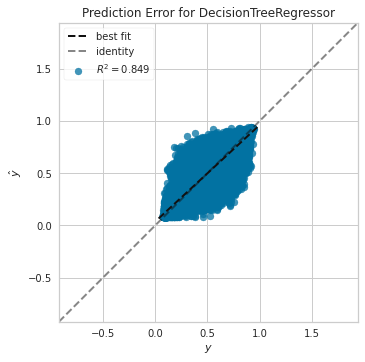

In [35]:
plot_model(baseline, plot = 'error')

The baseline model is *pratically* symmetric around the *identity line* where ($y^{ˆ}$ = $y$), that is, the *ideal case* that *predictions* are exactly the *ground truth*. Let us see if there is space for improvements at the *hyperparameter exercise*.

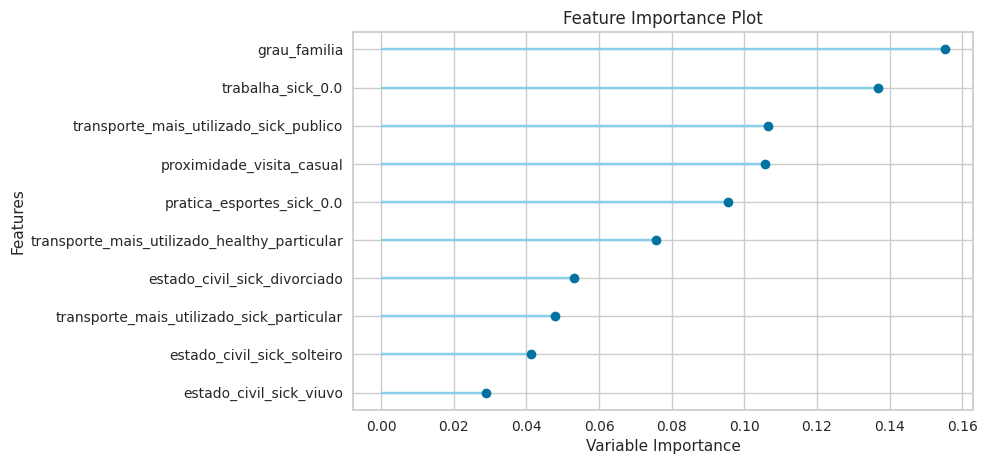

In [36]:
plot_model(baseline, plot = 'feature')

This plot is interesting and important, because it validates what we have investigated before at *EDA phase*. The results are in *aggrement* with we discovered there. The *categorical variables* for *sick people* mostly corrlates with `prob_V1_V2` (*target*) and we see, in the chart above, that the model concludes the same. It interpreted the *categorical variables* as valious for the *regression task*.

## Hypertunning

**IMPORTANT**: This task takes a while.

In [51]:
tuned_dt = tune_model(baseline, n_iter=3, fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0912,0.0132,0.1150,0.5631,0.0777,0.2280
1,0.0897,0.0127,0.1129,0.5790,0.0768,0.2264
2,0.0909,0.0128,0.1132,0.5761,0.0772,0.2332
Mean,0.0906,0.0129,0.1137,0.5728,0.0772,0.2292
SD,0.0007,0.0002,0.0009,0.0069,0.0004,0.0029


The *hypertunning* test shows that the `tunned_dt` model performed worse than the baseline. But this is because of the `n_iter` and `fold`. We can play with those parameters, and enventually increase the performance of the *hypertunning exercise*. Increasing those values may improve the performance but will also increase the training time. So we decided to move with *baseline* for now.

# Save Model

In [37]:
save_model(baseline, model_name='./assets/oms-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['qt_filhos_sick',
                                                           'qt_filhos_healthy'],
                                       target='prob_V1_V2', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fil...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=None, max_features=None,
                                        

# Load Model

In [38]:
loaded_model = load_model('./assets/oms-model')

Transformation Pipeline and Model Successfully Loaded


## Estimating the *contamination rate* for the rest of population

In [39]:
#getting the data wth NaN values for prob_V1_V2
df_estimation = df[df['prob_V1_V2'].isnull()].drop(['V1', 'V2'], axis=1).reset_index(drop=True)

In [40]:
unseen_predictions = predict_model(loaded_model, data=df_estimation)

In [41]:
unseen_predictions.head()

,grau,proximidade,idade_healthy,estado_civil_healthy,qt_filhos_healthy,estuda_healthy,trabalha_healthy,pratica_esportes_healthy,transporte_mais_utilizado_healthy,IMC_healthy,...,qt_filhos_sick,estuda_sick,trabalha_sick,pratica_esportes_sick,transporte_mais_utilizado_sick,IMC_sick,prob_V1_V2,IMC_class_healthy,IMC_class_sick,Label
0,trabalho,visita_casual,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,...,0.0,0.0,0.0,1.0,publico,25.378720,NaN,acima_do_peso,acima_do_peso,0.636365
1,amigos,mora_junto,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942,...,1.0,0.0,0.0,1.0,particular,19.952393,NaN,peso_normal,peso_normal,0.291573
2,familia,mora_junto,50.0,divorciado,0.0,1.0,0.0,NaN,publico,21.445628,...,1.0,1.0,1.0,0.0,publico,26.732053,NaN,peso_normal,acima_do_peso,0.232772
3,trabalho,visita_casual,21.0,solteiro,0.0,0.0,0.0,0.0,publico,24.375770,...,2.0,1.0,0.0,1.0,publico,15.295668,NaN,peso_normal,muito_abaixo_peso,0.643718
4,familia,visita_casual,42.0,viuvo,1.0,0.0,1.0,0.0,publico,NaN,...,1.0,0.0,1.0,0.0,publico,20.412942,NaN,None,peso_normal,0.272167


In [44]:
unseen_predictions['Label'].describe().to_frame()

,Label
count,500000.000000
mean,0.484745
std,0.174095
min,0.074913
25%,0.351489
50%,0.485614
75%,0.617853
max,0.942245


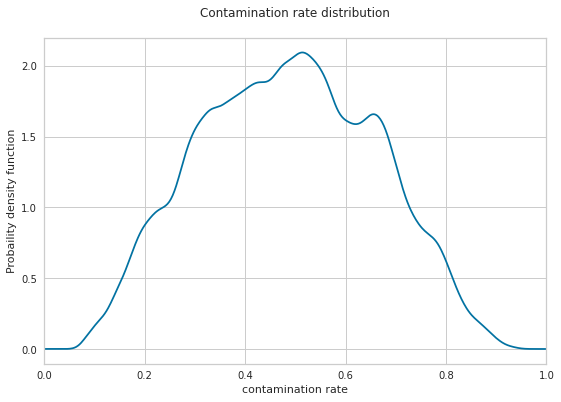

In [45]:
plt.figure(figsize=(9,6))
unseen_predictions['Label'].plot(kind='kde')
plt.ylabel('Probaility density function')
plt.xlabel('contamination rate')
plt.xlim([0,1])
plt.title('Contamination rate distribution\n')
plt.show()

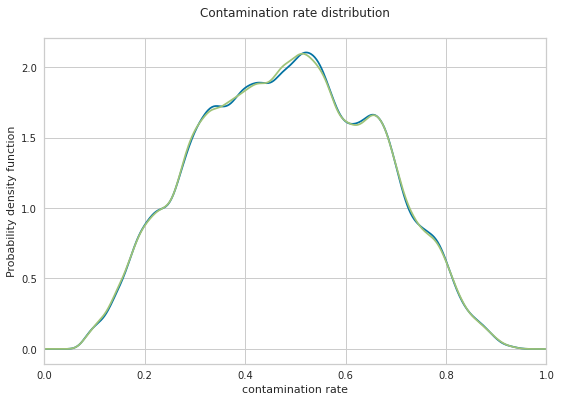

In [48]:
#comparison between both datasets
plt.figure(figsize=(9,6))
df['prob_V1_V2'].plot(kind='kde')
unseen_predictions['Label'].plot(kind='kde')
plt.ylabel('Probability density function')
plt.xlabel('contamination rate')
plt.xlim([0,1])
plt.title('Contamination rate distribution\n')
plt.show()

The *Probability density function* (PDF) of the predictions over the unseen data and the one that were used for trainning is *pratically* the same.